Zadanie1: Jaką minimalną i maksymalną wartość może przyjmować współczynnik Giniego? Uzasadnij. Co to wtedy oznacza?

Współczynnik Giniego może przyjmować wartości od 0 do 1, wynika tak ze wzoru na ten współczynnik - nie otrzymamy wartości wyższej niż 1 ani mniejszej niż 0. Im wyższa wartość (=im bliższa 1) tym model jest bardziej wiarygodny

Zadanie2: Uzasadnij wartość entropii w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [1]:
import math
#entropy = 1.58
#samples = 105
#value = 34, 32, 39

I = -(34/105 * math.log2(34/105) + 32/105 * math.log2(32/105) + 39/105 * math.log2(39/105))
print(I)


1.5799176782552726


Zadanie3: Uzasadnij wartość indeksu Giniego w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [2]:
#entropy = 1.58
#samples = 105
#value = 34, 32, 39

Gini = 1 - (pow(34/105, 2)+ pow(32/105, 2)+ pow(39/105, 2))
print (Gini)

0.6643083900226757


Zadanie4: Przeczytaj https://predictivesolutions.pl/jak-udoskonalic-algorytm-drzew-decyzyjnych. Sporządź odpowiednią notatkę.

    Drzewa decyzyjne są algorytmem umożliwiającym podział obserwacji na mniejsze grupy za pomocą reguł decyzyjnych. Wraz z rozsrastaniem się drzewa i dzieleniem gałęzi na kolejne, mniejsze, uzyskujemy coraz bardziej jednorodne grupy. Jego historia sięga lat 70 ubiegłego wieku, ale jego źródeł możemy doszukiwać się nawet i kilka wieków wcześniej, w pracach Linneusza, którego podział organizmów żywych na mniejsze podgrupy przypomina właśnie obecnie nam znane drzewa decyzyjne. Działanie algorytmu ma swoje przedstawienie graficzne, co ułatwia wnioskowanie. 
    W dzisiejszych czasach metoda ta jest często i skutecznie stosowana w uczeniu maszynowym, nie jest jednak metodą doskonałą - problemy mogą pojawić się np. w kwestii stabilności wyników. Poniżej przedstawiono po krótce możliwe sposoby na udoskonalenie działania algorytmu. 
        1) Bagging - agregacja bootstrapowa. Polega na wybieraniu danych do podzbiorów poprzez losowanie ze zwracaniem. W efekcie część danych ze zbioru oryginalnego nie zostaje wylosowana do zbioru uczącego i stanowi zbiór walidacyjny; nie ma konieczności dzielenia zbioru oryginalnego na uczący i walidacyjny. Wynik predykcji jest określony na podstawie głosowania. Wadami tej metody jest czasochłonność, skomplikowanie a także niestabilność modelu wynikająca z podobnej struktury pojedynczych klasyfikatorów. 
        2) Lasy losowe - model zdolny do rozwiązywania problemów zarówno regresyjnych jak i klasyfikacyjnych. Metoda ta różni się od wcześniej opisanej tym, że do poszczególnych modeli drzew wykorzystuje się tylko część predyktorów. Wynik predykcji jest określony na podstawie głosowania. Algorytm ten cechuje się stabilnością, ale jest czasochłonny oraz trudniejszy pod względem interpretacji wyników.
        3) Adaboost - metoda polegająca na budowanie modelu o dużej sile predykcyjnej, złożonego z wielu słabych klasyfikatorów. Klasyfikatory są ze sobą ściśle powiązane, co różni ten model od poprzednio opisanych, w których pojedyncze drzewa nie są od siebie zależne. Błędy zmniejszają się z każdą kolejną iteracją, co jednak grozi przetrenowaniem modelu. 
        4) Xgboost - algorytm wzmacniania gradientowego. W tym przypadku na ostateczną ocenę dotycząca klasyfikacji również mają wpływ wszystkie drzewa decyzyjne i wykorzystywana jest metoda przyrostowa, ale co wyróżnia ten algorytm od innych to wprowadzenie regularyzacji, która kontroluje złożoność modelu i zapobiega przetrenowaniu. 

Zadanie5: Modele lasu drzew decyzyjnych często wykorzystują metodę modyfikowania danych treningowych - agregację bootstrapową (bootstraping). Polega ona na wielokrotnym losowaniu ze zwracaniem. Jeżeli takie losowanie powtózymy $n$ razy, 
otrzymamy $n$ elementowy zbiór danych treningowych, w którym część przypadków będzie się powtarzać. 
Pokaż, że dla dużych $n$ próba będzie zawierała średnio $63 \%$ przypadków z orginalnego zbioru.

In [19]:

import random
from random import choices
from collections import Counter
import statistics

#Zbiór początkowy, w którym znajduje się 100 randomowych liczb:
original_set = random.sample(range(500), 100)

#Losowanie odbędzie się 10000 razy, losujemy po 100 liczb z oryginalnego zbioru, losowanie ze zwracaniem

all_repeats = [] #lista do zliczania ile powtórzyło się wartości

for i in range (10000):
        new_set = random.choices(original_set, k = 100)
        
        #Sprawdzam ile powtarza się w zbiorze new względem original
        repeats = list((Counter(original_set) & Counter(new_set)).elements())
        all_repeats.append(len(repeats))

#Ze wszystkich zsumowanych ilości powtórzeń liczymy średnią:
mean_of_repeats = statistics.mean(all_repeats)
print(mean_of_repeats)
      
#Wow. Wyszło!!!

63.3871


Zadanie6: Rozważ dane zawierające nagłówki, przy czym są to fake newsy (1298) oraz prawdziwe tytuły (1968). 
Jeden nagłówek to jeden rekord. 
    
- Wyznacz częstości występowania wszystkich słów ze wszystkich nagłówków.
- Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych a jakie w fałszywych nagłówkach?

Będziemy tworzyć klasyfiaktor dla tych danych w oparciu o regresję logistyczną oraz drzewa losowe/lasy losowe. 
Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa 
(długość wektora = liczba wszystkich unikatowych słów, może warto jednak zawęzić? albo potraktować jako hiperparametr).
Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy. 
Przetestuj różne zestawy hiperparametrów na zbiorze walidacyjnym. Skomentuj otrzymane wyniki.

In [62]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [63]:
with open("real.txt", "r") as input_file:
    real = input_file.read().split("\n")
print(len(real))
    
with open("fake.txt", "r") as input_file:
    fake = input_file.read().split("\n")
print(len(fake))

1968
1298


In [64]:
stopwords = set(stopwords.words('english'))
numbers ="0123456789"


In [65]:
#Czyszczenie ze stopwords i cyfr:

clean_fake =[]
clean_real = []

for x in fake:
    clean_fake.append([word for word in word_tokenize(x) if word not in stopwords and word not in numbers])
for x in real:
    clean_real.append([word for word in word_tokenize(x) if word not in stopwords and word not in numbers])

In [68]:
#"Spłaszczenie" list -> żeby wszystko było w jednej liście a nie zagnieżdżonych listach

real = [item for sublist in clean_real for item in sublist]
fake = [item for sublist in clean_fake for item in sublist]

In [80]:
#Częstości występowania wszystkich słów ze wszystkich nagłówków:
all_words = real + fake

freq_of_all = FreqDist(all_words)
print(freq_of_all)

for i, (x, y) in enumerate(freq_of_all.items()):
    print(x, ":", y, "times")


<FreqDist with 5696 samples and 24425 outcomes>
donald : 1057 times
trump : 3072 times
remember : 4 times
year : 16 times
since : 11 times
elected : 21 times
defends : 23 times
son : 7 times
emails : 15 times
moscow : 5 times
hits : 13 times
back : 34 times
strategist : 6 times
says : 225 times
media : 54 times
wont : 20 times
easily : 1 times
give : 5 times
america : 74 times
anthony : 9 times
scaramucci : 10 times
trumps : 223 times
new : 106 times
comms : 2 times
director : 17 times
mobile : 1 times
phone : 13 times
use : 6 times
worries : 1 times
security : 22 times
experts : 8 times
us : 269 times
election : 161 times
voters : 32 times
exit : 3 times
polls : 19 times
signs : 18 times
orders : 11 times
limiting : 1 times
refugee : 22 times
intake : 1 times
syria : 27 times
regime : 1 times
change : 28 times
administration : 23 times
priority : 1 times
un : 34 times
haley : 3 times
asx : 5 times
open : 12 times
higher : 5 times
wall : 62 times
street : 19 times
optimistic : 1 times


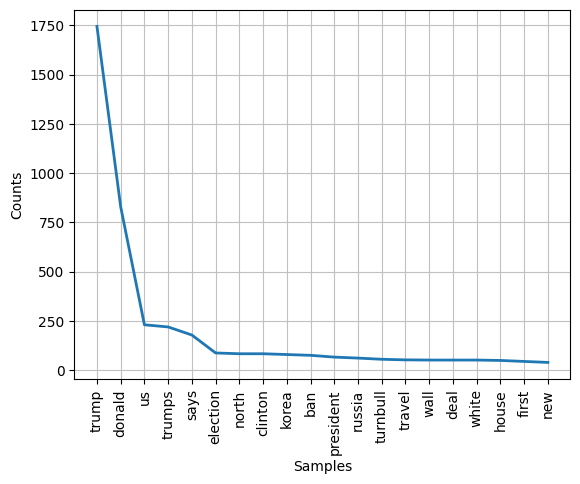

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [83]:
#Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych nagłówkach?
most_common_real = FreqDist(real)
most_common_real.plot(20)

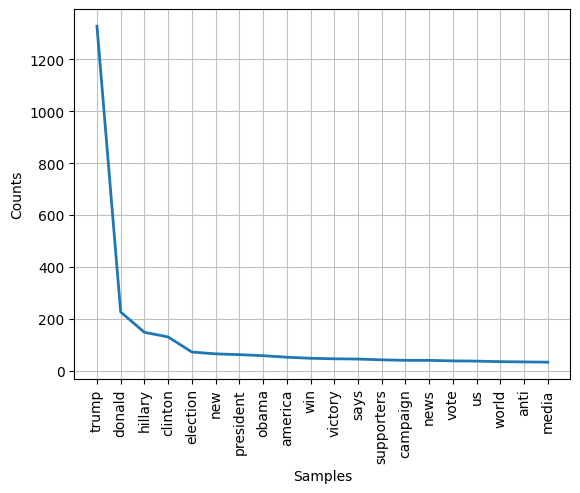

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [84]:
#Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w fałszywych nagłówkach?
most_common_fake = FreqDist(fake)
most_common_fake.plot(20)

In [ ]:
#Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa 

# - tutaj już sobie nie umiałam poradzić


In [96]:
#Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy. 
random.shuffle(all_words)
print(0.7 * len(all_words))
print(0.15 * len(all_words))
print(17097 + 3663)

17097.5
3663.75
20760
24425


In [ ]:
train_set = all_words[:17097]
validation_set = all_words[17097:20760]
test_set = all_words[20760:]
